In [113]:
import pandas as pd
import csv
import datetime
import seaborn as sns
from linearmodels import PanelOLS
from linearmodels.panel import compare
import numpy as np
from collections import OrderedDict
import matplotlib.pyplot as plt

In [2]:
file_name = r'C:\Thesis\Gasoline\data-20211015-structure-20211015.csv'

data = pd.read_csv(file_name, encoding ='latin-1', sep = ';')
data.head(10)

C:\Users\D\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: DtypeWarning: Columns (11,13,16,31,58,59,66,71,73,78) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,GA,GB,G1,G2,G3,G4,G5,G6,G7,G8,...,G68,G69,G70,G71,G72,G73,G74,G75,G76,G77
0,1,79000000000,79000000000,01.01.2019,78.70,100.38,63.13,38.17,79.36,46.87,...,965.95,1842.00,42.96,46.87,50.2,45.53,103778.69,56968.84,121.19,13973.49
1,2,80000000000,80000000000,01.01.2019,69.15,84.15,61.30,31.50,67.54,46.20,...,15074.27,30584.41,40.29,43.35,46.94,45.62,1099104.63,375923.72,3223.41,81037.39
2,3,81000000000,81000000000,01.01.2019,56.43,97.02,51.62,25.32,55.27,27.85,...,3204.75,6911.39,40.36,42.53,45.77,46.71,239870.50,136817.63,3905.41,37508.24
3,4,84000000000,84000000000,01.01.2019,51.47,0.00,54.87,25.69,59.69,42.97,...,658.86,1170.00,42.09,44.08,49.04,46.23,45629.57,24429.64,704.37,2541.63
4,5,82000000000,82000000000,01.01.2019,78.65,0.00,46.81,34.74,65.84,55.26,...,401.96,774.50,43.61,45.83,0.0,41.50,3155.40,1311.98,0.00,24.ñåí
5,6,26000000000,26000000000,01.01.2019,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,39.5,41.40,46.5,0.00,49600.58,24468.51,1041.87,0.00
6,7,83000000000,83000000000,01.01.2019,99.24,90.24,55.35,37.51,79.80,62.03,...,824.29,910.00,42.25,46.05,50.55,45.18,89465.74,45259.42,720.97,9484.12
7,8,85000000000,85000000000,01.01.2019,78.67,0.00,53.00,0.00,0.00,0.00,...,339.00,683.00,41.72,45.53,0.0,45.45,46114.22,13240.43,0.00,4773.01
8,9,91000000000,91000000000,01.01.2019,89.43,0.00,56.50,0.00,77.41,52.25,...,638.59,551.00,42.35,45.71,0.0,45.31,54380.41,29017.93,0.00,7962.06
9,10,86000000000,86000000000,01.01.2019,84.54,96.43,87.41,34.31,73.79,48.03,...,3649.78,5193.00,40.06,43.68,49.61,47.48,123395.71,84124.73,1430.90,38218.24


In [48]:
file_name = r'C:\Thesis\Gasoline\structure-20211015.csv'

descr =pd.read_csv(file_name, sep = ';', usecols = ['Id', 'Field name', 'English name', 'Description', 'unit of measurement', 'field Type', 'unique', 'obligatory', 'length'])
descr

,Id,Field name,English name,Description,unit of measurement,field Type,unique,obligatory,length
0,GA,Дата наблюдения,region,Дата наблюдения,ДД.ММ.ГГГГ,(dd.mm.yyyy),Yes,Yes,255 символов
1,GB,Код региона в кодировке ФНС России,oktmo,Код региона в кодировке ФНС России,NaN,string,No,No,10 символов
2,G1,ОКАТО региона РФ,okato,ОКАТО региона РФ,NaN,string,No,No,10 символов
3,G2,ОКТМО региона РФ,date,ОКТМО региона РФ,NaN,string,No,No,10 символов
4,G3,Макароны,pasta,Макароны,руб/кг,numeric,No,No,10 символов
...,...,...,...,...,...,...,...,...,...
74,G73,Дизельное топливо,dt,Дизельное топливо,руб/литр,numeric,No,No,10 символов
75,G74,Бензин марки АИ-92 (Объем проданной продукции),ai92_value,Бензин марки АИ-92 (Объем проданной продукции),литр,numeric,No,No,10 символов
76,G75,Бензин марки АИ-95 (Объем проданной продукции),ai95_value,Бензин марки АИ-95 (Объем проданной продукции),литр,numeric,No,No,10 символов
77,G76,Бензин марки АИ-98 (Объем проданной продукции),ai98_value,Бензин марки АИ-98 (Объем проданной продукции),литр,numeric,No,No,10 символов


In [58]:
file_name1 = r'C:\Thesis\Gasoline\Data.pkl'
data.to_pickle(file_name1)
file_name2 = r'C:\Thesis\Gasoline\Description.pkl'
descr.to_pickle(file_name2)

## Load database

In [2]:
file_name1 = r'C:\Thesis\Gasoline\Data.pkl'
data = pd.read_pickle(file_name1)

In [6]:
gasoline = data[['GA','GB','G1','G2','G70','G71','G72','G73','G74','G75','G76','G77']]
gasoline['G70'] = pd.to_numeric(gasoline['G70'], errors = 'coerce')
gasoline['G72'] = pd.to_numeric(gasoline['G72'], errors = 'coerce')
gasoline['G76'] = pd.to_numeric(gasoline['G76'], errors = 'coerce')
gasoline['G77'] = pd.to_numeric(gasoline['G77'], errors = 'coerce')
gasoline['G2'] = pd.to_datetime(gasoline['G2'],format = '%d.%m.%Y')

C:\Users\D\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\D\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\D\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [7]:
# Create series of months
gasoline['month'] = np.array(gasoline['G2'],dtype = 'datetime64[M]')
gasoline

C:\Users\D\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,GA,GB,G1,G2,G70,G71,G72,G73,G74,G75,G76,G77,month
0,1,79000000000,79000000000,2019-01-01,42.96,46.87,50.20,45.53,103778.69,56968.84,121.19,13973.49,2019-01-01
1,2,80000000000,80000000000,2019-01-01,40.29,43.35,46.94,45.62,1099104.63,375923.72,3223.41,81037.39,2019-01-01
2,3,81000000000,81000000000,2019-01-01,40.36,42.53,45.77,46.71,239870.50,136817.63,3905.41,37508.24,2019-01-01
3,4,84000000000,84000000000,2019-01-01,42.09,44.08,49.04,46.23,45629.57,24429.64,704.37,2541.63,2019-01-01
4,5,82000000000,82000000000,2019-01-01,43.61,45.83,0.00,41.50,3155.40,1311.98,0.00,NaN,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86610,86,71100000000,71100000000,2021-10-15,47.46,50.39,58.32,54.76,716726.25,511777.09,1742.01,29670.08,2021-10-01
86611,87,77000000000,77000000000,2021-10-15,60.00,63.00,0.00,62.00,3732.41,2833.45,0.00,2025.75,2021-10-01
86612,89,71140000000,71140000000,2021-10-15,46.21,48.48,0.00,53.61,151893.88,181284.64,0.00,18965.75,2021-10-01
86613,91,35000000000,35000000000,2021-10-15,50.45,54.27,62.96,53.18,498210.88,706259.13,13140.42,326440.22,2021-10-01


In [160]:
dates = gasoline['month'].unique()
MonthlyPrices = pd.DataFrame(index = dates, columns = ['G92', 'G95', 'G98', 'Diesel'])
gasoline['Vol92'] = gasoline['G70']*gasoline['G74']
gasoline['Vol95'] = gasoline['G71']*gasoline['G75']
gasoline['Vol98'] = gasoline['G72']*gasoline['G76']
gasoline['VolD'] = gasoline['G73']*gasoline['G77']
MonthlyPrices.loc[:,'G92'] = gasoline.groupby(by = 'month')['Vol92'].sum()/gasoline.groupby(by = 'month')['G74'].sum()
MonthlyPrices.loc[:,'G95'] = gasoline.groupby(by = 'month')['Vol95'].sum()/gasoline.groupby(by = 'month')['G75'].sum()
MonthlyPrices.loc[:,'G98'] = gasoline.groupby(by = 'month')['Vol98'].sum()/gasoline.groupby(by = 'month')['G76'].sum()
MonthlyPrices.loc[:,'Diesel'] = gasoline.groupby(by = 'month')['VolD'].sum()/gasoline.groupby(by = 'month')['G77'].sum()
MonthlyPrices.head()

C:\Users\D\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\D\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\D\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,G92,G95,G98,Diesel
2019-01-01,41.536358,45.107264,49.346749,46.743924
2019-02-01,41.598901,45.198681,49.383188,46.729707
2019-03-01,41.514787,45.156177,49.290924,46.568580
2019-04-01,41.502701,45.142951,49.112338,45.921665
2019-05-01,41.552271,45.168249,49.177011,45.603897


## Daily prices

In [25]:
days = gasoline['G2'].unique()
AveragePrices = pd.DataFrame(index = days, columns = ['92', '95', '98', 'Diesel'])
for date in days:
    AveragePrices.loc[date,'92'] = (gasoline[gasoline['G2']==date].dropna()['G70']*gasoline[gasoline['G2']==date].dropna()['G74']).sum()/gasoline[gasoline['G2']==date].dropna()['G74'].sum()
    AveragePrices.loc[date,'95'] = (gasoline[gasoline['G2']==date].dropna()['G71']*gasoline[gasoline['G2']==date].dropna()['G75']).sum()/gasoline[gasoline['G2']==date].dropna()['G75'].sum()
    AveragePrices.loc[date,'98'] = (gasoline[gasoline['G2']==date].dropna()['G72']*gasoline[gasoline['G2']==date].dropna()['G76']).sum()/gasoline[gasoline['G2']==date].dropna()['G76'].sum()
    AveragePrices.loc[date,'Diesel'] = (gasoline[gasoline['G2']==date].dropna()['G73']*gasoline[gasoline['G2']==date].dropna()['G77']).sum()/gasoline[gasoline['G2']==date].dropna()['G77'].sum()

<AxesSubplot:>

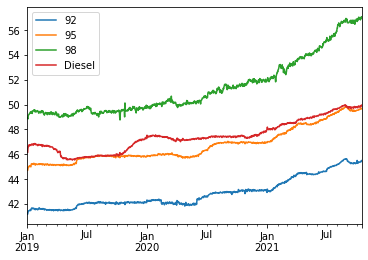

In [26]:
AveragePrices.plot()

In [107]:
FirstExcise = AveragePrices.loc['2019-12':'2020-01']
FirstExcise['days'] = ((FirstExcise.index - pd.to_datetime('2020-01-01'))/np.timedelta64(1, 'D')).astype(int)
FirstExcise['year'] = FirstExcise.index.year
SecondExcise = AveragePrices.loc['2020-12':'2021-01']
SecondExcise['days'] = ((SecondExcise.index - pd.to_datetime('2021-01-01'))/np.timedelta64(1, 'D')).astype(int)
SecondExcise['year'] = SecondExcise.index.year

C:\Users\D\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\D\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\D\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

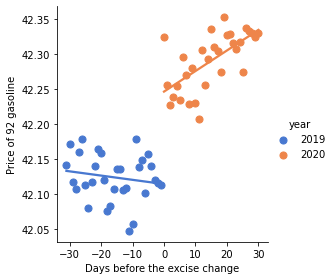

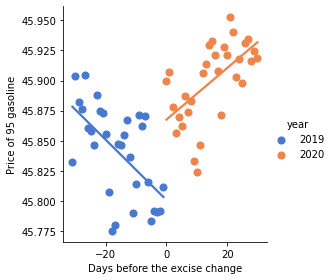

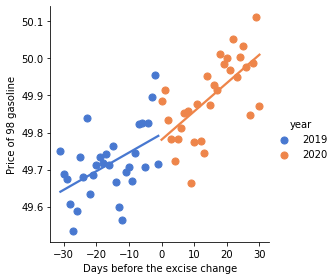

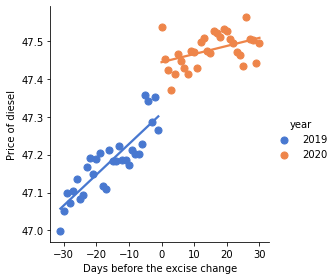

In [137]:
g = sns.lmplot(x="days", y="92", data=FirstExcise, hue ='year', ci=None, palette="muted", height=4, scatter_kws={"s": 50, "alpha": 1})
g.set_axis_labels("Days before the excise change", "Price of 92 gasoline")
h = sns.lmplot(x="days", y="95", data=FirstExcise, hue ='year', ci=None, palette="muted", height=4, scatter_kws={"s": 50, "alpha": 1})
h.set_axis_labels("Days before the excise change", "Price of 95 gasoline")
i = sns.lmplot(x="days", y="98", data=FirstExcise, hue ='year', ci=None, palette="muted", height=4, scatter_kws={"s": 50, "alpha": 1})
i.set_axis_labels("Days before the excise change", "Price of 98 gasoline")
j = sns.lmplot(x="days", y="Diesel", data=FirstExcise, hue ='year', ci=None, palette="muted", height=4, scatter_kws={"s": 50, "alpha": 1})
j.set_axis_labels("Days before the excise change", "Price of diesel")


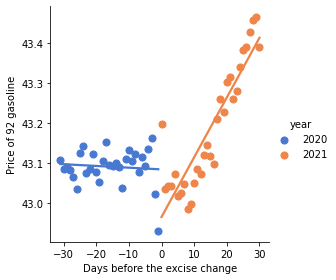

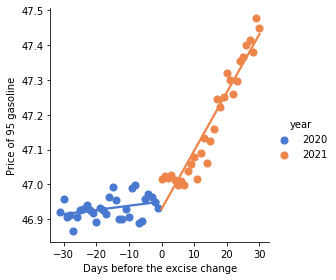

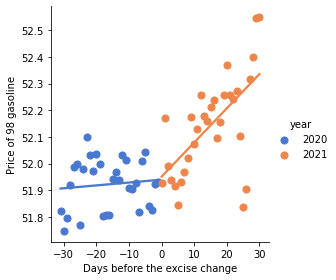

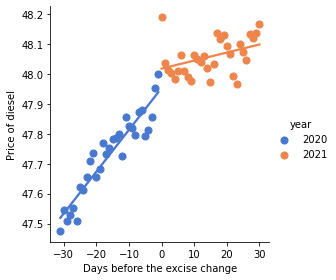

In [138]:
g = sns.lmplot(x="days", y="92", data=SecondExcise, hue ='year', ci=None, palette="muted", height=4, scatter_kws={"s": 50, "alpha": 1})
g.set_axis_labels("Days before the excise change", "Price of 92 gasoline")
g = sns.lmplot(x="days", y="95", data=SecondExcise, hue ='year', ci=None, palette="muted", height=4, scatter_kws={"s": 50, "alpha": 1})
g.set_axis_labels("Days before the excise change", "Price of 95 gasoline")
g = sns.lmplot(x="days", y="98", data=SecondExcise, hue ='year', ci=None, palette="muted", height=4, scatter_kws={"s": 50, "alpha": 1})
g.set_axis_labels("Days before the excise change", "Price of 98 gasoline")
g = sns.lmplot(x="days", y="Diesel", data=SecondExcise, hue ='year', ci=None, palette="muted", height=4, scatter_kws={"s": 50, "alpha": 1})
g.set_axis_labels("Days before the excise change", "Price of diesel")


## Average monthly ER RUR to USD

In [157]:
file_name = r'C:\Thesis\Gasoline\USDRUR.xlsx'

ER = pd.read_excel(file_name)
ER['Date'] = np.array(ER['data'],dtype = 'datetime64[M]')
AverageER = ER.groupby(by='Date').mean()['curs']
AverageER.head()

C:\Users\D\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Date
2019-01-01    66.512544
2019-02-01    65.810525
2019-03-01    65.092257
2019-04-01    64.603105
2019-05-01    64.818706
Name: curs, dtype: float64

## Average Urals Prices

In [158]:
file_name = r'C:\Thesis\Gasoline\Urals.xlsx'

Urals = pd.read_excel(file_name)
Urals['Date'] = np.array(Urals['Date'],dtype = 'datetime64[M]')
Urals = Urals.set_index('Date')
Urals.head()

,Urals
Date,
2021-10-01,81.71
2021-09-01,72.50
2021-08-01,68.33
2021-07-01,72.77
2021-06-01,71.46


In [159]:
# Merge Urals and ER
NDPI = pd.merge(Urals, AverageER, left_index = True, right_index = True)
NDPI['KoefPrice'] = (NDPI['Urals'] - 15)*NDPI['curs']/261
NDPI = NDPI.sort_index()
NDPI.head()

,Urals,curs,KoefPrice
Date,,,
2019-01-01,59.81,66.512544,11.419261
2019-02-01,63.92,65.810525,12.335061
2019-03-01,65.96,65.092257,12.709201
2019-04-01,71.65,64.603105,14.022092
2019-05-01,71.28,64.818706,13.976999


In [161]:
# Merge NDPI with average prices
MonthlyPrices = pd.merge(MonthlyPrices, NDPI['KoefPrice'], left_index = True, right_index = True)
MonthlyPrices['year'] = MonthlyPrices.index.year
MonthlyPrices.loc[:,'Tax'] = MonthlyPrices['KoefPrice']*919 *0.86 /1000
MonthlyPrices.head()

,G92,G95,G98,Diesel,KoefPrice,year,Tax
2019-01-01,41.536358,45.107264,49.346749,46.743924,11.419261,2019,9.025099
2019-02-01,41.598901,45.198681,49.383188,46.729707,12.335061,2019,9.748892
2019-03-01,41.514787,45.156177,49.290924,46.568580,12.709201,2019,10.044590
2019-04-01,41.502701,45.142951,49.112338,45.921665,14.022092,2019,11.082220
2019-05-01,41.552271,45.168249,49.177011,45.603897,13.976999,2019,11.046581


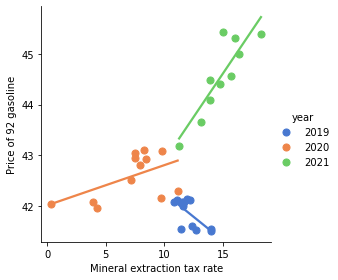

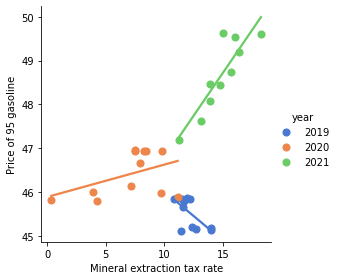

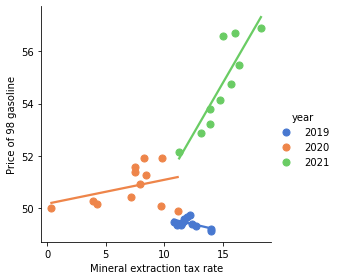

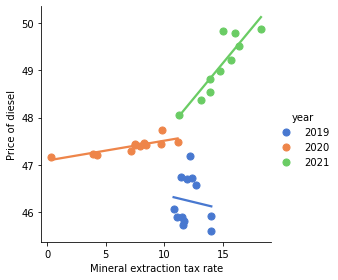

In [162]:
g = sns.lmplot(x="KoefPrice", y="G92", data=MonthlyPrices, hue = 'year', ci=None, palette="muted", height=4, scatter_kws={"s": 50, "alpha": 1})
g.set_axis_labels("Mineral extraction tax rate", "Price of 92 gasoline")
h= sns.lmplot(x="KoefPrice", y="G95", data=MonthlyPrices, hue = 'year', ci=None, palette="muted", height=4, scatter_kws={"s": 50, "alpha": 1})
h.set_axis_labels("Mineral extraction tax rate", "Price of 95 gasoline")
i = sns.lmplot(x="KoefPrice", y="G98", data=MonthlyPrices, hue = 'year', ci=None, palette="muted", height=4, scatter_kws={"s": 50, "alpha": 1})
i.set_axis_labels("Mineral extraction tax rate", "Price of 98 gasoline")
j = sns.lmplot(x="KoefPrice", y="Diesel", data=MonthlyPrices, hue = 'year', ci=None, palette="muted", height=4, scatter_kws={"s": 50, "alpha": 1})
j.set_axis_labels("Mineral extraction tax rate", "Price of diesel")

## Monthly prices by regions

In [164]:
#gasoline.groupby(['GA','month'])

dates = gasoline['month'].unique()
regions = gasoline['GA'].unique()
arrays = pd.MultiIndex.from_product([regions,dates], names = ['Region', 'Date'])
RegionPrices = pd.DataFrame(index = arrays, columns = ['G92', 'G95', 'G98', 'Diesel'])

#gasoline['Vol92'] = gasoline['G70']*gasoline['G74']
#gasoline['Vol95'] = gasoline['G71']*gasoline['G75']
#gasoline['Vol98'] = gasoline['G72']*gasoline['G76']
#gasoline['VolD'] = gasoline['G73']*gasoline['G77']
RegionPrices.loc[:,'G92'] = gasoline.groupby(by = ['GA','month'])['Vol92'].sum()/gasoline.groupby(by = ['GA','month'])['G74'].sum()
RegionPrices.loc[:,'G95'] = gasoline.groupby(by = ['GA','month'])['Vol95'].sum()/gasoline.groupby(by = ['GA','month'])['G75'].sum()
RegionPrices.loc[:,'G98'] = gasoline.groupby(by = ['GA','month'])['Vol98'].sum()/gasoline.groupby(by = ['GA','month'])['G76'].sum()
RegionPrices.loc[:,'Diesel'] = gasoline.groupby(by = ['GA','month'])['VolD'].sum()/gasoline.groupby(by = ['GA','month'])['G77'].sum()
RegionPrices = RegionPrices.reset_index()
RegionPrices.head()

,Region,Date,G92,G95,G98,Diesel
0,1,2019-01-01,42.576262,47.456015,50.402609,45.958161
1,1,2019-02-01,42.511892,47.580841,50.191787,45.907924
2,1,2019-03-01,42.941829,47.542387,50.217976,45.524363
3,1,2019-04-01,42.906642,47.684910,50.555211,44.810041
4,1,2019-05-01,42.938963,47.786143,50.363169,44.921727


In [165]:
base = pd.merge(left = RegionPrices, right = NDPI['KoefPrice'].reset_index(), left_on = 'Date', right_on = 'Date')
base = base.set_index(pd.MultiIndex.from_arrays([base['Region'],base['Date']]))
# 919 is the base rate on Mineral extraction tax, 
# 0.86 is the conversion from tons of oil into tons of gasoline, 
# 1000 is to convert qubuc meters into liters

base.loc[:,'Tax'] = base['KoefPrice']*919 *0.86 /1000
#base = np.log(base[['G92', 'G95', 'G98', 'Diesel', 'Tax']])
base.head()

,,Region,Date,G92,G95,G98,Diesel,KoefPrice,Tax
Region,Date,,,,,,,,
1,2019-01-01,1,2019-01-01,42.576262,47.456015,50.402609,45.958161,11.419261,9.025099
2,2019-01-01,2,2019-01-01,40.729327,43.871820,47.228870,46.191338,11.419261,9.025099
3,2019-01-01,3,2019-01-01,40.900946,43.097681,46.306236,47.332388,11.419261,9.025099
4,2019-01-01,4,2019-01-01,42.179670,44.152772,49.016233,46.902680,11.419261,9.025099
5,2019-01-01,5,2019-01-01,43.580610,45.908293,NaN,41.185568,11.419261,9.025099


In [166]:
# FE REGRESSION
formula = 'Diesel ~ Tax + EntityEffects' # You need to include 'EntityEffects' as the regressor
model = PanelOLS.from_formula(formula, base) # Keep in mind that you should have a dataframe with the multiindex (entity and time)
results = model.fit(cov_type = 'clustered', cluster_entity=True)

print(results)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 Diesel   R-squared:                        0.0989
Estimator:                   PanelOLS   R-squared (Between):              0.0530
No. Observations:                2858   R-squared (Within):               0.0989
Date:                Mon, Nov 22 2021   R-squared (Overall):              0.0530
Time:                        13:46:52   Log-likelihood                   -4851.8
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      304.25
Entities:                          85   P-value                           0.0000
Avg Obs:                       33.624   Distribution:                  F(1,2772)
Min Obs:                       7.0000                                           
Max Obs:                       34.000   F-statistic (robust):             319.06
                            

C:\Users\D\Anaconda3\lib\site-packages\linearmodels\shared\exceptions.py:35: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


In [167]:
formula1 = 'G92 ~ Tax + EntityEffects' # You need to include 'EntityEffects' as the regressor
model1 = PanelOLS.from_formula(formula1, base) # Keep in mind that you should have a dataframe with the multiindex (entity and time)
formula2 = 'G95 ~ Tax + EntityEffects' # You need to include 'EntityEffects' as the regressor
model2 = PanelOLS.from_formula(formula2, base) # Keep in mind that you should have a dataframe with the multiindex (entity and time)
formula3 = 'G98 ~ Tax + EntityEffects' # You need to include 'EntityEffects' as the regressor
model3 = PanelOLS.from_formula(formula3, base) # Keep in mind that you should have a dataframe with the multiindex (entity and time)
formula4 = 'Diesel ~ Tax + EntityEffects' # You need to include 'EntityEffects' as the regressor
model4 = PanelOLS.from_formula(formula4, base) # Keep in mind that you should have a dataframe with the multiindex (entity and time)

res = OrderedDict()
res[r'(1)'] = model1.fit(cov_type = 'clustered', cluster_entity=True)
res[r'(2)'] = model2.fit(cov_type = 'clustered', cluster_entity=True)
res[r'(3)'] = model3.fit(cov_type = 'clustered', cluster_entity=True)
res[r'(4)'] = model4.fit(cov_type = 'clustered', cluster_entity=True)

results = compare(res, precision = ('std-errors'), stars = True)
print(results)

                                Model Comparison                               
                                  (1)           (2)           (3)           (4)
-------------------------------------------------------------------------------
Dep. Variable                     G92           G95           G98        Diesel
Estimator                    PanelOLS      PanelOLS      PanelOLS      PanelOLS
No. Observations                 2876          2876          2297          2858
Cov. Est.                   Clustered     Clustered     Clustered     Clustered
R-squared                      0.1918        0.2065        0.0002        0.0989
R-Squared (Within)             0.1918        0.2065        0.0002        0.0989
R-Squared (Between)            0.0967        0.0867       -0.0361        0.0530
R-Squared (Overall)            0.0970        0.0869       -0.0302        0.0530
F-statistic                    662.12        725.97        0.3435        304.25
P-value (F-stat)               0.0000   

C:\Users\D\Anaconda3\lib\site-packages\linearmodels\panel\results.py:1022: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  1,


In [168]:
print(results.summary.as_latex())

\begin{center}
\begin{tabular}{lcccc}
\toprule
                                 &  \textbf{(1)} &  \textbf{(2)} &  \textbf{(3)} &  \textbf{(4)}  \\
\midrule
\textbf{Dep. Variable}           &      G92      &      G95      &      G98      &     Diesel     \\
\textbf{Estimator}               &    PanelOLS   &    PanelOLS   &    PanelOLS   &    PanelOLS    \\
\textbf{No. Observations}        &      2876     &      2876     &      2297     &      2858      \\
\textbf{Cov. Est.}               &   Clustered   &   Clustered   &   Clustered   &   Clustered    \\
\textbf{R-squared}               &     0.1918    &     0.2065    &     0.0002    &     0.0989     \\
\textbf{R-Squared (Within)}      &     0.1918    &     0.2065    &     0.0002    &     0.0989     \\
\textbf{R-Squared (Between)}     &     0.0967    &     0.0867    &    -0.0361    &     0.0530     \\
\textbf{R-Squared (Overall)}     &     0.0970    &     0.0869    &    -0.0302    &     0.0530     \\
\textbf{F-statistic}             & 